# review text

In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,sent_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('C:/Users/lenovo/Downloads/nextaso_interview/chrome_reviews.csv')
dataset

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome
...,...,...,...,...,...,...,...,...,...,...
7199,684987,https://play.google.com/store/apps/details?id=...,Bagusss..,5,0,boima panjaitan,NaN,88.0.4324.93,2021-03-05,com.android.chrome
7200,684988,https://play.google.com/store/apps/details?id=...,Bad version 😔,1,0,निशान्त सिंह,NaN,88.0.4324.181,2021-03-05,com.android.chrome
7201,684989,https://play.google.com/store/apps/details?id=...,One thing that I have to say I can't spelled t...,5,0,Virgie Allen,NaN,89.0.4389.72,2021-03-05,com.android.chrome
7202,684990,https://play.google.com/store/apps/details?id=...,Excellent,5,0,Kazuo Guevarra,NaN,89.0.4389.72,2021-03-05,com.android.chrome


In [3]:
dataset.rename(columns={'Text':'text','Star':'sentiment'},inplace=True)

In [4]:
dataset

,ID,Review URL,text,sentiment,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome
...,...,...,...,...,...,...,...,...,...,...
7199,684987,https://play.google.com/store/apps/details?id=...,Bagusss..,5,0,boima panjaitan,NaN,88.0.4324.93,2021-03-05,com.android.chrome
7200,684988,https://play.google.com/store/apps/details?id=...,Bad version 😔,1,0,निशान्त सिंह,NaN,88.0.4324.181,2021-03-05,com.android.chrome
7201,684989,https://play.google.com/store/apps/details?id=...,One thing that I have to say I can't spelled t...,5,0,Virgie Allen,NaN,89.0.4389.72,2021-03-05,com.android.chrome
7202,684990,https://play.google.com/store/apps/details?id=...,Excellent,5,0,Kazuo Guevarra,NaN,89.0.4389.72,2021-03-05,com.android.chrome


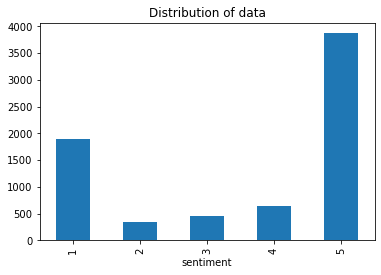

In [5]:
# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
#dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
#ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
#text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [6]:
dataset['text']

0                              This is very helpfull aap.
1                                                    Good
2          Not able to update. Neither able to uninstall.
3                                                Nice app
4                                       Many unwanted ads
                              ...                        
7199                                            Bagusss..
7200                                        Bad version 😔
7201    One thing that I have to say I can't spelled t...
7202                                            Excellent
7203    After update it lag and always slow same goes ...
Name: text, Length: 7204, dtype: object

In [7]:
text_en = dataset['text']

In [8]:
text_en = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en.head()

0                        This is very helpfull aap.
1                                              Good
2    Not able to update. Neither able to uninstall.
3                                          Nice app
4                                 Many unwanted ads
Name: text, dtype: object

In [9]:
# Defining regex patterns.
#urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern       = '@[^\]+'
alphaPattern      = "[^a-zA-Z0-9]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"
PROP_NAME         = '[^SYNTAX_CHAR]'
PROP_VALUE        = '[\P{C}]'

In [10]:
text_en = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en.head()

0                        This is very helpfull aap.
1                                              Good
2    Not able to update. Neither able to uninstall.
3                                          Nice app
4                                 Many unwanted ads
Name: text, dtype: object

In [11]:
text_en = text_en.apply(lambda x: x.lower())
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: text, dtype: object

In [12]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', PROP_NAME)))
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: text, dtype: object

In [13]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', PROP_VALUE)))
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: text, dtype: object

In [14]:
#text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', alphaPattern)))
#text_en.head()

In [15]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', userPattern)))
text_en.head()

0                        this is very helpfull aap.
1                                              good
2    not able to update. neither able to uninstall.
3                                          nice app
4                                 many unwanted ads
Name: text, dtype: object

In [16]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', sequencePattern)))
text_en.head()

0                       this is very helpfull aap
1                                            good
2    not able to update neither able to uninstall
3                                        nice app
4                               many unwanted ads
Name: text, dtype: object

In [17]:
text_en = text_en.apply(lambda x: x.translate(str.maketrans('', '', seqReplacePattern)))
text_en.head()

0                       this is very helpfull aap
1                                            good
2    not able to update neither able to uninstall
3                                        nice app
4                               many unwanted ads
Name: text, dtype: object

In [18]:
data1 = pd.DataFrame(text_en, columns = ['text'])

In [19]:
text, sentiment = list(data1['text']), list(dataset['sentiment'])

In [20]:
#dataset = pd.concat([data1['text'], dataset['sentiment'].apply(pd.Series)], axis=1)
#dataset

In [21]:
datazip = []
for text, sentiment in zip(text, sentiment):
    datazip.append((text,sentiment))
        
# Convert the list into a Pandas DataFrame.
df = pd.DataFrame(datazip, columns = ['text','sentiment'])

In [22]:
datazip

[('this is very helpfull aap', 5),
 ('good', 3),
 ('not able to update neither able to uninstall', 1),
 ('nice app', 4),
 ('many unwanted ads', 1),
 ('this app good', 4),
 ('yes yes', 5),
 ('awesome', 5),
 ('very bad app 😞', 1),
 ('many times i tried to update its not updating and now whenever i try to use the app it freezes and goes back to home',
  1),
 ('good', 5),
 ('very good app', 5),
 ('app is not getting update and it is not getting open too and saying u r using very old version plz update but it is not updating',
  1),
 ('mostly useful', 5),
 ('everything ia possible on chrome i like it', 5),
 ('very coming in real status thank you', 1),
 ('good', 5),
 ('low download speed', 3),
 ('suuper', 4),
 ('i want to download greana free fire but that not comming in file', 1),
 ('good for news and etc', 5),
 ('best', 4),
 ('good', 5),
 ('mydeviceshavebeenhacked and im just a humble christian i know and all knowing hard and i need to do what they tell me to all to know two face is hard t

In [23]:
df

,text,sentiment
0,this is very helpfull aap,5
1,good,3
2,not able to update neither able to uninstall,1
3,nice app,4
4,many unwanted ads,1
...,...,...
7199,bagusss,5
7200,bad version 😔,1
7201,one thing that i have to say i can't spelled t...,5
7202,excellent,5


In [24]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'],
                                                    test_size = 0.05, random_state = 0)



In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

In [28]:
vectoriser = CountVectorizer(ngram_range=(1,3), analyzer='word', encoding = "ISO-8859-1")

In [29]:
vectoriser = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [30]:
vectoriser.fit_transform(df['text'].values.astype('U'))

<7204x5413 sparse matrix of type '<class 'numpy.float64'>'
	with 41627 stored elements in Compressed Sparse Row format>

In [31]:
#vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
#vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  5413


In [32]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [33]:
X_train

<6843x5413 sparse matrix of type '<class 'numpy.float64'>'
	with 39778 stored elements in Compressed Sparse Row format>

In [34]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    print(cf_matrix)
    
    

In [35]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           1       0.65      0.56      0.60        82
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        33
           5       0.69      0.95      0.80       210

    accuracy                           0.68       361
   macro avg       0.27      0.30      0.28       361
weighted avg       0.55      0.68      0.60       361

[[ 46   1   0   0  35]
 [  5   0   0   0   9]
 [  9   0   0   0  13]
 [  1   0   0   0  32]
 [ 10   0   0   0 200]]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           1       0.63      0.71      0.67        82
           2       0.50      0.07      0.12        14
           3       1.00      0.05      0.09        22
           4       0.33      0.03      0.06        33
           5       0.74      0.93      0.82       210

    accuracy                           0.71       361
   macro avg       0.64      0.36      0.35       361
weighted avg       0.69      0.71      0.65       361

[[ 58   1   0   1  22]
 [  8   1   0   0   5]
 [  9   0   1   0  12]
 [  3   0   0   1  29]
 [ 14   0   0   1 195]]


In [37]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

           1       0.67      0.80      0.73        82
           2       0.00      0.00      0.00        14
           3       1.00      0.05      0.09        22
           4       0.00      0.00      0.00        33
           5       0.76      0.94      0.84       210

    accuracy                           0.73       361
   macro avg       0.49      0.36      0.33       361
weighted avg       0.65      0.73      0.66       361

[[ 66   0   0   0  16]
 [  9   0   0   0   5]
 [  9   0   1   0  12]
 [  3   0   0   0  30]
 [ 12   0   0   0 198]]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()


In [39]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('C:\\Users\\lenovo\\Downloads\\nextaso_interview\\vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('C:\\Users\\lenovo\\Downloads\\nextaso_interview\\Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([1,2,3,4,5], ["Risky","Terrible","Woeful","Enjoyable","Satisfied"])
    return df


In [40]:
df

,text,sentiment
0,this is very helpfull aap,5
1,good,3
2,not able to update neither able to uninstall,1
3,nice app,4
4,many unwanted ads,1
...,...,...
7199,bagusss,5
7200,bad version 😔,1
7201,one thing that i have to say i can't spelled t...,5
7202,excellent,5


In [41]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "Good",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good",
           "Not able to update. Neither able to uninstall.",
           "Many unwanted ads",
           'Awesome',
           "My phone is samsung s9 and I can't update the app"]
    
    final = predict(vectoriser, LRmodel, text)
    print(final.head())

                                             text  sentiment
0                                  I hate twitter      Risky
1                                            Good  Satisfied
2                      May the Force be with you.  Satisfied
3                 Mr. Stark, I don't feel so good  Satisfied
4  Not able to update. Neither able to uninstall.      Risky


In [42]:
final

,text,sentiment
0,I hate twitter,Risky
1,Good,Satisfied
2,May the Force be with you.,Satisfied
3,"Mr. Stark, I don't feel so good",Satisfied
4,Not able to update. Neither able to uninstall.,Risky
5,Many unwanted ads,Risky
6,Awesome,Satisfied
7,My phone is samsung s9 and I can't update the app,Risky
